In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("data.csv",index_col=0)

Saving data.csv to data (2).csv


In [ ]:
df.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
Patient_ID,,,,,,,,,,
P0,2,0,1,1,1,0,1,0,0,0
P1,0,1,0,1,1,0,0,1,0,1
P2,0,0,1,0,0,0,0,1,0,1
P3,2,1,0,0,0,1,1,1,0,1
P4,3,1,1,0,0,0,1,1,0,1


In [ ]:
df.describe()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000.000000,25000.000000,25000.000000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,1.493520,0.493800,0.502160,0.49944,0.49944,0.501080,0.501320,0.503360,0.497840,0.636360
std,1.122822,0.499972,0.500005,0.50001,0.50001,0.500009,0.500008,0.499999,0.500005,0.481056
min,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.00000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


                                Systemic Illness   Rectal Pain   Sore Throat  \
Systemic Illness                    0.000000e+00  7.601279e-01  8.146449e-01   
Rectal Pain                         7.992472e-01  0.000000e+00  4.845194e-01   
Sore Throat                         4.651268e-01  4.881492e-01  0.000000e+00   
Penile Oedema                       2.524054e-01  3.861647e-01  9.291197e-01   
Oral Lesions                        2.524054e-01  3.861647e-01  9.291197e-01   
Solitary Lesion                     5.932055e-01  8.980810e-01  6.868716e-01   
Swollen Tonsils                     9.538839e-01  8.134963e-01  8.223000e-01   
HIV Infection                       8.526034e-01  5.207077e-01  9.315382e-01   
Sexually Transmitted Infection      7.522436e-01  9.404721e-01  8.312968e-01   
MonkeyPox                           3.199584e-95  4.754849e-41  1.507453e-09   

                                Penile Oedema  Oral Lesions  Solitary Lesion  \
Systemic Illness                 8.7588

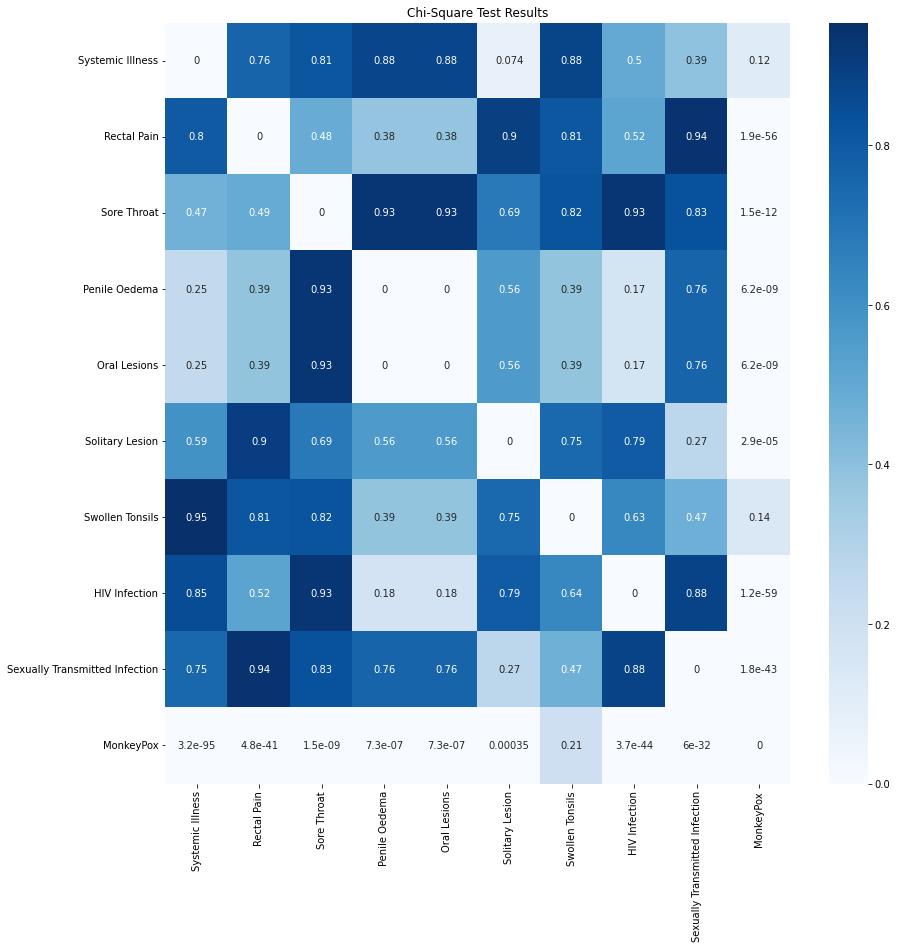

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import chi2

# Resultant Dataframe will be a dataframe where the column names and Index will be the same
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

# Plotting a heatmap
fig = plt.figure(figsize=(14,14))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()